## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import hvplot.pandas

## Load the dataset

In [2]:
dataset = pd.read_csv(r"C:\Users\SALOME\Downloads\archive (1)\HR-Employee-Attrition.csv") 
dataset.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## Explanatory Data Analysis

In [3]:
dataset.shape

(1470, 35)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Summary statistics of numerical variables
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Check for null values
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
businesstravel = dataset['BusinessTravel'].value_counts()
businesstravelDF = pd.DataFrame(businesstravel)
businesstravelDF

,BusinessTravel
Travel_Rarely,1043
Travel_Frequently,277
Non-Travel,150


### Get a count of employees that stayed and left the company

In [8]:
dataset['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## Data Visualization

<Axes: xlabel='Attrition', ylabel='count'>

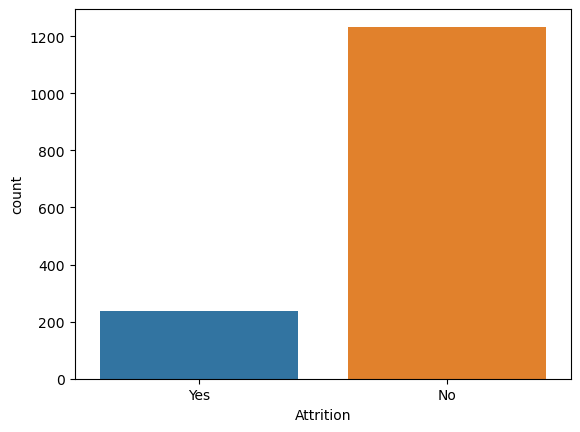

In [9]:
#Visualize the number of employees that stayed and left the company
# sns.countplot(dataset['Attrition'])
sns.countplot(x = 'Attrition', data = dataset)


In [10]:
# Finding out if our model said no everytime what the accuracy would be (Percentage for attrition if we just guessed no)
(1233 - 237) /1233

0.8077858880778589

### Summary statistics of categorical variables

In [11]:
    cat_cols = dataset.select_dtypes(include = object).columns.tolist()
    
    cat_df = pd.DataFrame(dataset[cat_cols].melt(var_name='column', value_name='value')    #pandas.melt reshapes data from wide to long format
                         .value_counts()).rename(columns = {0: 'count'}).sort_values(by=['column', 'count'])
    
    
    display(dataset.select_dtypes(include = object). describe())
    display(cat_df)
    

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

<Axes: xlabel='Age', ylabel='count'>

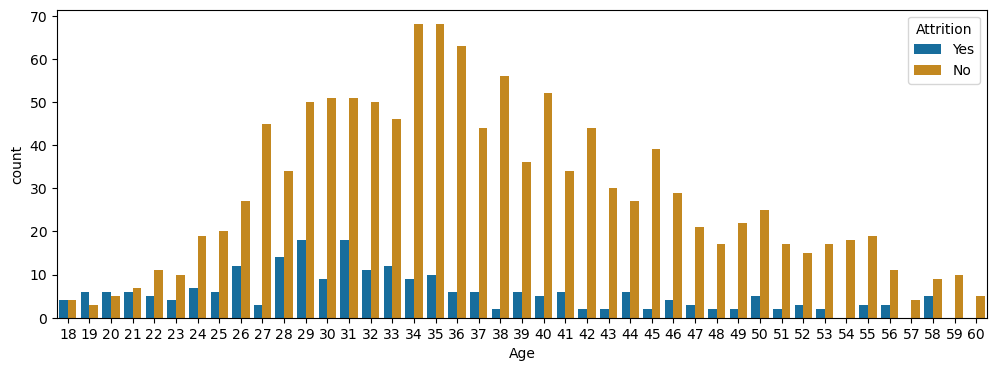

In [12]:
#Show the number of employees that left and stayed by age
plt.subplots(figsize=(12,4))  #make the figure 
sns.countplot(x='Age', hue='Attrition', data=dataset, palette = 'colorblind')

The majority of employees who left their jobs are between the ages of 26 and 35. Specifically, the ages with the highest attrition rates are 29 and 31.

In [13]:
# Print all of the data types and their unique values
# Same as summary of categorical values above

for column in dataset.columns:
    if dataset[column].dtype == object:
        print(str(column) + ':' + str(dataset[column].unique()))
        print(dataset[column].value_counts())
        print('_____________________________')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_____________________________
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_____________________________
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_____________________________
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_____________________________
Gender:['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
_____________________________
JobRole:['Sales Executive' 'Research Scientist' '

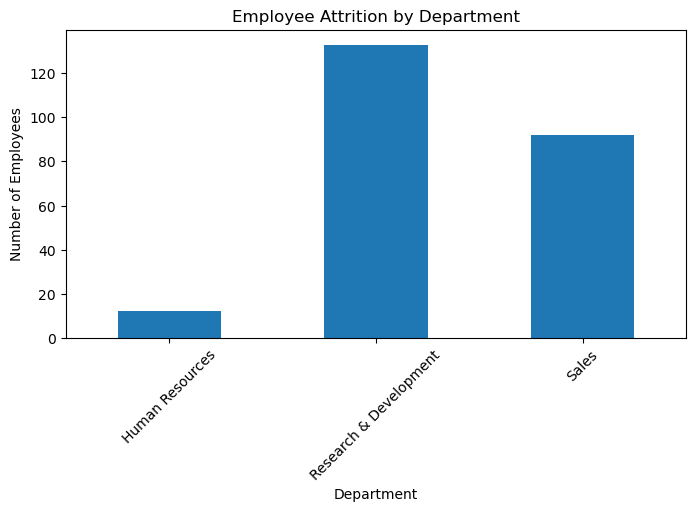

In [14]:
attrition_by_dept = dataset[dataset['Attrition'] == 'Yes'].groupby('Department').size()

# Plot the data
fig, ax = plt.subplots(figsize=(8, 4))
attrition_by_dept.plot(kind='bar', ax=ax)
ax.set_title('Employee Attrition by Department')
ax.set_xlabel('Department')
ax.set_ylabel('Number of Employees')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

 Most of the individuals who left their jobs were from the Human Resources department.

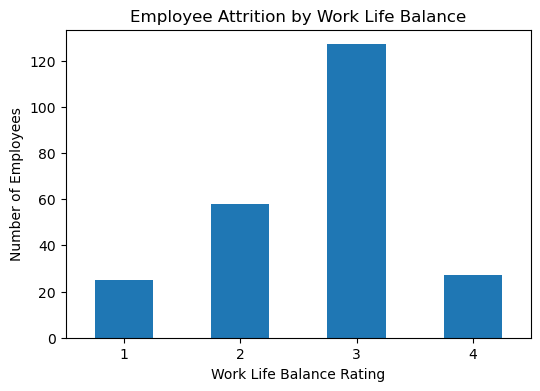

In [15]:
attrition_by_wlb = dataset[dataset['Attrition'] == 'Yes'].groupby('WorkLifeBalance').size()

# Plot the data
fig, ax = plt.subplots(figsize=(6, 4))
attrition_by_wlb.plot(kind='bar')
ax.set_title('Employee Attrition by Work Life Balance')
ax.set_xlabel('Work Life Balance Rating')
ax.set_ylabel('Number of Employees')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

A notable number of employees who rated their work-life balance as 3 out of 4 left the company. This indicates, workers with moderate work-life balance ratings may be more susceptible to attrition

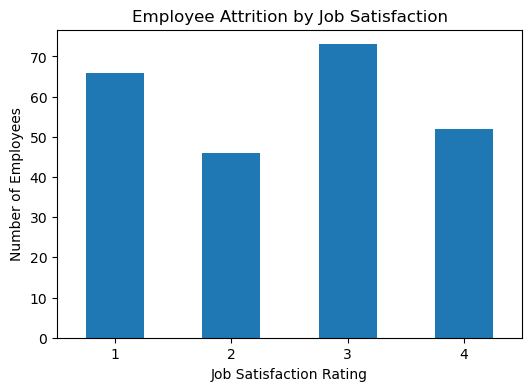

In [16]:
attrition_by_js = dataset[dataset['Attrition'] == 'Yes'].groupby('JobSatisfaction').size()

# Plot the data
fig, ax = plt.subplots(figsize=(6, 4))
attrition_by_js.plot(kind='bar')
ax.set_title('Employee Attrition by Job Satisfaction')
ax.set_xlabel('Job Satisfaction Rating')
ax.set_ylabel('Number of Employees')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

Job satisfaction did not have a significant impact on employee attrition. Many employees who left their jobs reported high levels of job satisfaction

In [17]:
dataset['EmployeeCount']. unique()  #check unique values in a column and see if we need to drop it

array([1], dtype=int64)

In [18]:
# Remove some useless columns
dataset = dataset.drop('Over18', axis = 1)
dataset = dataset.drop('EmployeeNumber', axis = 1 )
dataset = dataset.drop('StandardHours', axis = 1 )
dataset = dataset.drop('EmployeeCount', axis = 1 )

# axis = 0 refers to row
# axis = 1 refers to column


In [19]:
# Get the correlation
dataset.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<Axes: >

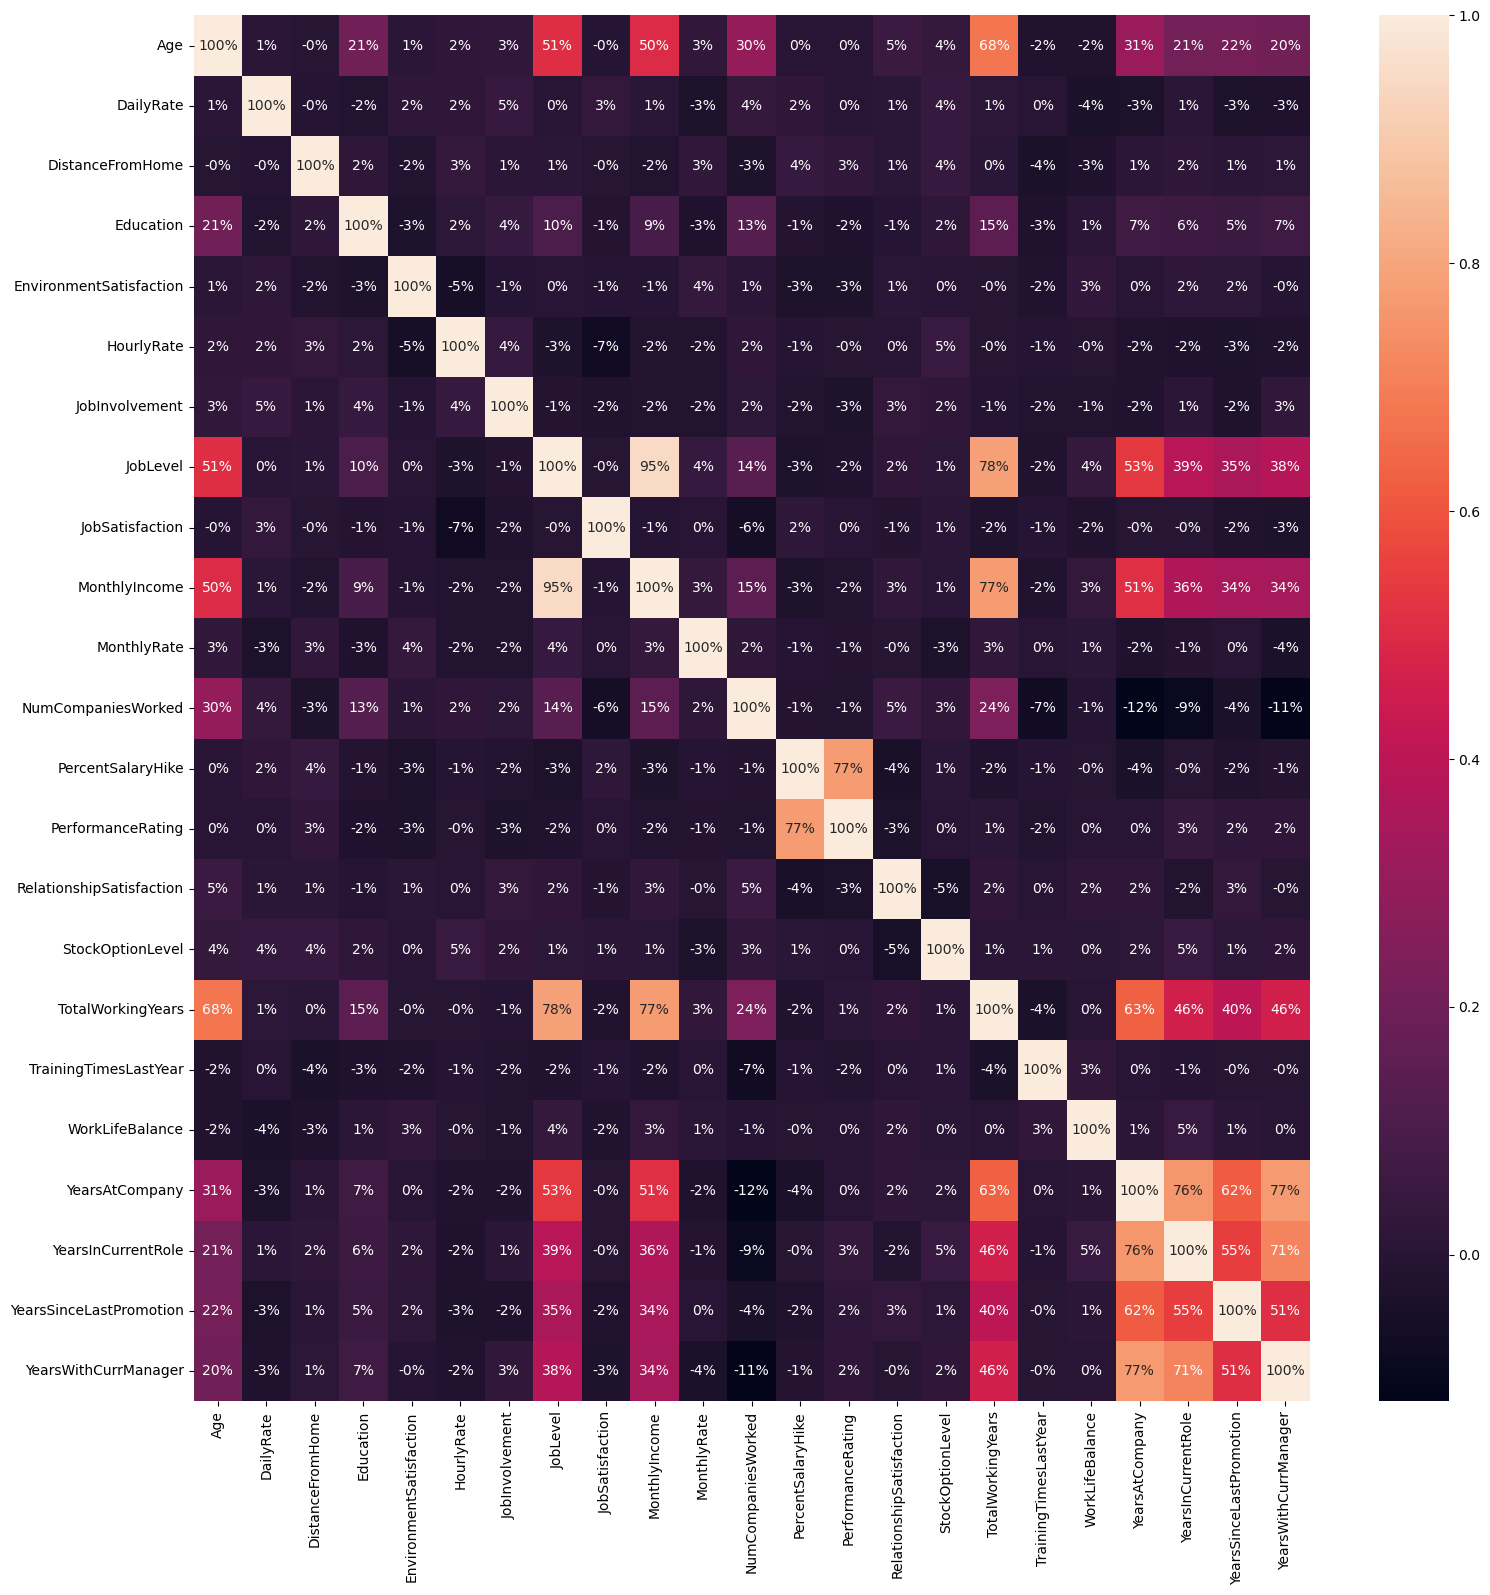

In [20]:
#Visualize the correlation
plt.figure(figsize=(18,18))
sns.heatmap(dataset.corr(), annot=True, fmt='.0%')

In [21]:
#Transform the data
# Transform non-numerical into numerical col


for column in dataset.columns:
    if dataset[column].dtype == np.number:
        continue
    dataset[column] = LabelEncoder().fit_transform(dataset[column])

In [22]:
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


In [23]:
# create a new column
dataset['Age_Years']= dataset['Age']

In [24]:
#Drop the age column
dataset = dataset.drop('Age', axis = 1)

In [25]:
# Show the data frame
dataset

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


In [26]:
# Split the data 
X = dataset.iloc[:, 1:dataset.shape[1]].values
Y = dataset.iloc[:, 0].values

In [27]:
#split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [28]:
# Use the Random Forest Classifier 
forest = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy', random_state = 0)

# train the data
forest.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [29]:
# Get the accuracy on the training data set 
forest.score(X_train, Y_train)

0.9791288566243194

In [30]:
y_pred_test = forest.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [31]:
#Show the confusion matrix and accuracy score for the model on the test data
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Model Testing Accuracy = {}'.format( (TP + TN) / (TP + TN + FN + FP) ))

[[309   1]
 [ 49   9]]
Model Testing Accuracy = 0.8641304347826086


## Conclusion

Overall, 16% of employees left the company. Employees aged between 26 and 35, especially those around 29 and 31 years old, had the highest attrition rates. This age group could benefit from targeted efforts to improve retention.

While job satisfaction alone didn't strongly predict attrition, employees who rated their work-life balance as moderate (3 out of 4) were more likely to leave. This highlights the need to enhance work-life balance initiatives, particularly for those with moderate ratings, to boost retention and employee happiness.

The random forest classifier achieved a testing accuracy of approximately 86.4%. This indicates that the model performed well in predicting employee attrition. With further refinement, this predictive tool could effectively support HR strategies aimed at understanding and mitigating attrition.